In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Import of ML algorithms

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn import model_selection

In [4]:
df = pd.read_csv("Data\\train.csv")

In [5]:
print(f"Shape: {df.shape}")
df.head(10)

Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
seed = 0
X = df.iloc[:, 1:].copy().values
y = df['label'].copy().values

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)


In [29]:
models = [
    KNeighborsClassifier(metric="minkowski", n_neighbors=5, weights="distance"),
    SVC(C=0.1, gamma = 1, kernel="poly")
]
names = ["KNN", "SVC"]

scoring = "accuracy"

### Data without changes

In [11]:
for i, model in enumerate(models):
    cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
    msg = f"{names[i]}: Mean = {cv_results.mean()}. STD Dev = {cv_results.std()}"
    print(msg)

KNN: Mean = 0.9644047619047619. STD Dev = 0.0031642937761909512
SVC: Mean = 0.9710714285714286. STD Dev = 0.003136458583973278


In [24]:
knn = KNeighborsClassifier(metric="minkowski", n_neighbors=5, weights="distance")
svc = SVC(C=0.1, gamma = 1, kernel="poly")

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

print(f"{names[0]}: {knn.score(X_val, y_val)}")
print(f"{names[1]}: {svc.score(X_val, y_val)}")

KNN: 0.9703571428571428
SVC: 0.974047619047619


### Data changed to float and normalized in range [0, 1]

In [18]:
X_train_normal = X_train.astype(np.float32) / 255

In [20]:
for i, model in enumerate(models):
    cv_results = model_selection.cross_val_score(model, X_train_normal, y_train, scoring=scoring)
    msg = f"{names[i]}: Mean = {cv_results.mean()}. STD Dev = {cv_results.std()}"
    print(msg)

KNN: Mean = 0.9644047619047619. STD Dev = 0.0031642937761909512
SVC: Mean = 0.9710714285714286. STD Dev = 0.003136458583973278


No difference

### Data binarized (only values 0 and 1)

In [41]:
threshold = 0.5

X_train_bin = np.where(X_train_normal > threshold, 1, 0)

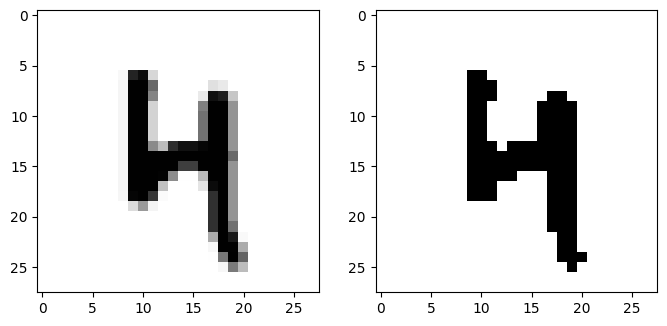

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
normal = X_train_normal[2].reshape((28,28))
binarized = X_train_bin[2].reshape((28,28))

ax[0].imshow(normal, cmap="Greys")
ax[1].imshow(binarized, cmap="Greys")

In [43]:
for i, model in enumerate(models):
    cv_results = model_selection.cross_val_score(model, X_train_bin, y_train, scoring=scoring)
    msg = f"{names[i]}: Mean = {cv_results.mean()}. STD Dev = {cv_results.std()}"
    print(msg)

KNN: Mean = 0.9514880952380953. STD Dev = 0.0034387559548486315
SVC: Mean = 0.965922619047619. STD Dev = 0.0034759050763467567


Accuracy went little down in KNN and is very similar in SVC. Let's check other threshold values

In [45]:
thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]
for t in thresholds:
    X_train_bin = np.where(X_train_normal > t, 1, 0)
    print(f"Threshold: {t}")
    for i, model in enumerate(models):
        cv_results = model_selection.cross_val_score(model, X_train_bin, y_train, scoring=scoring)
        msg = f"{names[i]}: Mean = {cv_results.mean()}. STD Dev = {cv_results.std()}"
        print(msg)
    print()

Threshold: 0.1
KNN: Mean = 0.9620833333333334. STD Dev = 0.0030906559489873925
SVC: Mean = 0.9735416666666667. STD Dev = 0.0024747162507127844

Threshold: 0.25
KNN: Mean = 0.9607440476190476. STD Dev = 0.003538288705214864
SVC: Mean = 0.9726190476190476. STD Dev = 0.003287309826543816

Threshold: 0.5
KNN: Mean = 0.9514880952380953. STD Dev = 0.0034387559548486315
SVC: Mean = 0.965922619047619. STD Dev = 0.0034759050763467567

Threshold: 0.75
KNN: Mean = 0.9245238095238095. STD Dev = 0.0028067858935362793
SVC: Mean = 0.9500892857142856. STD Dev = 0.0031293903400225666

Threshold: 0.9
KNN: Mean = 0.8697619047619047. STD Dev = 0.005678521513207803
SVC: Mean = 0.9139285714285714. STD Dev = 0.0037700240139499695



Increasing threshold seems to lower accuracy of models. It's better for low threshold though. Let's check threshold = 0.05.

In [46]:
t = 0.05
X_train_bin = np.where(X_train_normal > t, 1, 0)
print(f"Threshold: {t}")
for i, model in enumerate(models):
    cv_results = model_selection.cross_val_score(model, X_train_bin, y_train, scoring=scoring)
    msg = f"{names[i]}: Mean = {cv_results.mean()}. STD Dev = {cv_results.std()}"
    print(msg)

Threshold: 0.05
KNN: Mean = 0.9611607142857143. STD Dev = 0.003091515618731611
SVC: Mean = 0.9725892857142856. STD Dev = 0.0026190476190476254


Threshold's value of 0.1 seems to increase SVC accuracy by 0.0025 and little lowers KNN accuracy. It seems that those manipulations don't have big impact on model's effiency.